# Valence Pictures Classifier

This notebook was written by Zach Monge and is for creating an image classifier that can detect if an image is of a valence type positive, negative or neural. This script is for a supplementary analysis for the manuscript *Age-related differences in memory representational networks* authored by Zachary A. Monge, Maureen Ritchey, and Roberto Cabeza.
<br><br>
This notebook was ran in Google Colab and, therefore, parts of the script are specific to running the notebook in Colab.

Downloading fast.ai libraries

In [38]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Mounting Google Drive

In [39]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Importing functions

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

## Loading in data

Path to data

In [0]:
root_dir = "/content/gdrive/My Drive/"
base_dir = Path(root_dir + 'Colab Notebooks/EmoLOP_DNN_analysis/')

Loading in images. Adding in data augmentation. For the augmentation, used the default transforms. The training set is the images show during the encoding session and the validation set is the lures presented during retrieval.

In [0]:
IMG_PATH = base_dir/'imgs'

# Creating ImageDataBunch
tfms = get_transforms() # For data augmentation
data = ImageDataBunch.from_folder(IMG_PATH, train='trn', valid='val', size=128, ds_tfms=tfms)

Looking at classes and example images to make sure everything loaded OK.

In [0]:
data.classes

['neg', 'neut', 'pos']

In [46]:
len(data.train_ds), len(data.valid_ds)

(428, 210)

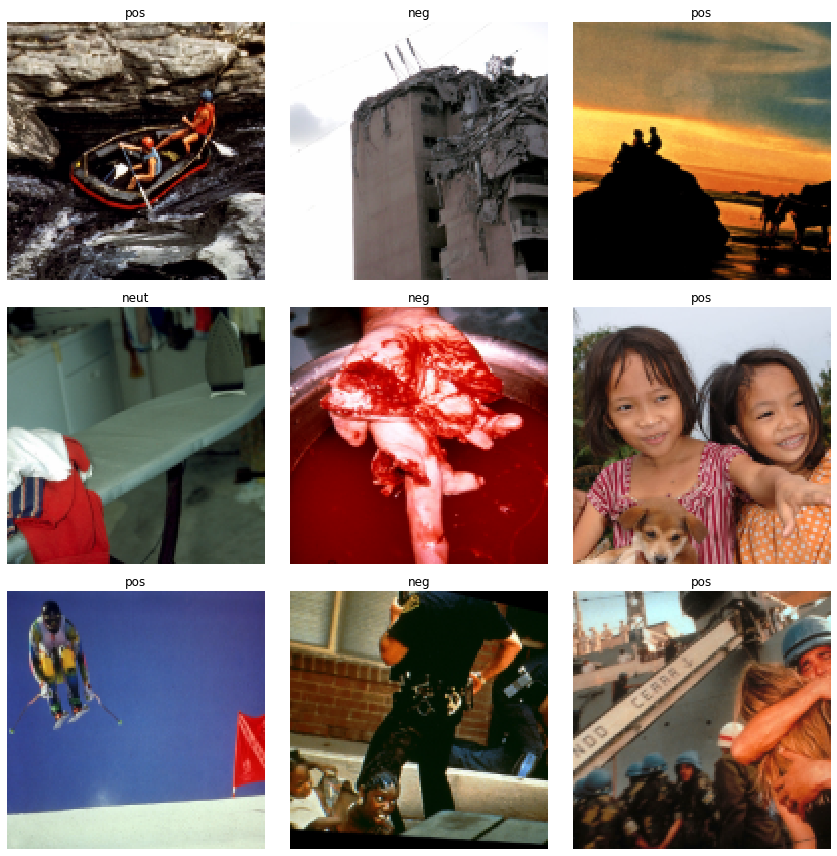

In [0]:
data.show_batch(3)

## Training Model

Creating the model. For the model using ResNet-50, which was pretrained on ImageNet.

In [0]:
arch = models.resnet50
learn = cnn_learner(data=data, base_arch=arch, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 94.7MB/s]


Using learning rate finder

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


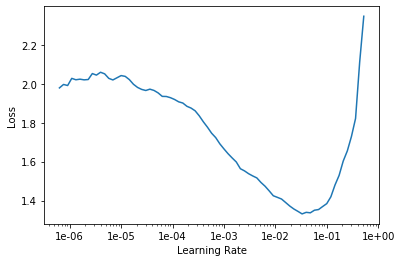

In [0]:
learn.recorder.plot()

In [0]:
lr = 1e-2

Training model using a one-cylce schedule (for paper describing one-cycle [click here](https://arxiv.org/pdf/1803.09820.pdf)). At first only training last layers.

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.872487,2.774118,0.552381,01:29
1,1.629113,3.034494,0.514286,00:09
2,1.342457,2.143832,0.557143,00:09
3,1.129850,1.533696,0.552381,00:09
4,0.985081,1.418141,0.557143,00:09


In [0]:
learn.save('resnet50-1')

In [0]:
learn.load('resnet50-1')

Learner(data=ImageDataBunch;

Train: LabelList (428 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
pos,pos,pos,pos,pos
Path: /content/gdrive/My Drive/Colab Notebooks/EmoLOP_DNN_analysis/imgs;

Valid: LabelList (210 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
neg,neg,neg,neg,neg
Path: /content/gdrive/My Drive/Colab Notebooks/EmoLOP_DNN_analysis/imgs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
       

Setting all layers to trainable

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


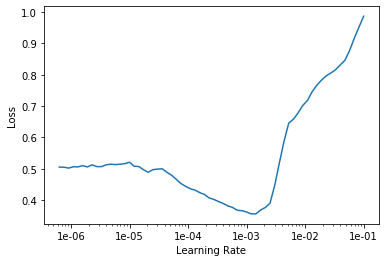

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.500847,1.335228,0.595238,00:09
1,0.430920,1.217313,0.628571,00:09
2,0.342516,1.221781,0.647619,00:09
3,0.296846,1.250241,0.647619,00:09
4,0.254613,1.224899,0.661905,00:09


In [0]:
learn.save('resnet50-2')

In [0]:
learn.load('resnet50-2')

Learner(data=ImageDataBunch;

Train: LabelList (428 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
pos,pos,pos,pos,pos
Path: /content/gdrive/My Drive/Colab Notebooks/EmoLOP_DNN_analysis/imgs;

Valid: LabelList (210 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
neg,neg,neg,neg,neg
Path: /content/gdrive/My Drive/Colab Notebooks/EmoLOP_DNN_analysis/imgs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
       